In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data from the uploaded CSV file
file_path = "//content//actv_user.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2


In [3]:
# Initialize lists to hold the weekly growth accounting metrics
retained_users = []
new_users = []
churned_users = []
resurrected_users = []

# Convert all user IDs to sets for easier computation
user_sets = [set(data[week]) for week in data.columns]

# Iterate through the weeks to calculate metrics
for i in range(1, len(user_sets)):
    previous_week = user_sets[i-1]
    current_week = user_sets[i]

    # Calculate retained, new, churned, and resurrected users
    retained = previous_week.intersection(current_week)
    new = current_week.difference(previous_week)
    churned = previous_week.difference(current_week)
    resurrected = current_week.difference(user_sets[0].union(*user_sets[1:i-1]))

    retained_users.append(len(retained))
    new_users.append(len(new))
    churned_users.append(len(churned))
    resurrected_users.append(len(resurrected))

# Create a DataFrame to hold the results
weeks = data.columns[1:]  # Skip the first week as it has no previous week to compare with
growth_metrics = pd.DataFrame({
    'Week': weeks,
    'Retained Users': retained_users,
    'New Users': new_users,
    'Churned Users': churned_users,
    'Resurrected Users': resurrected_users
})

growth_metrics.head()

,Week,Retained Users,New Users,Churned Users,Resurrected Users
0,w2,932,723,828,723
1,w3,1001,732,654,929
2,w4,1170,947,563,1015
3,w5,1395,799,722,950
4,w6,1480,676,714,774


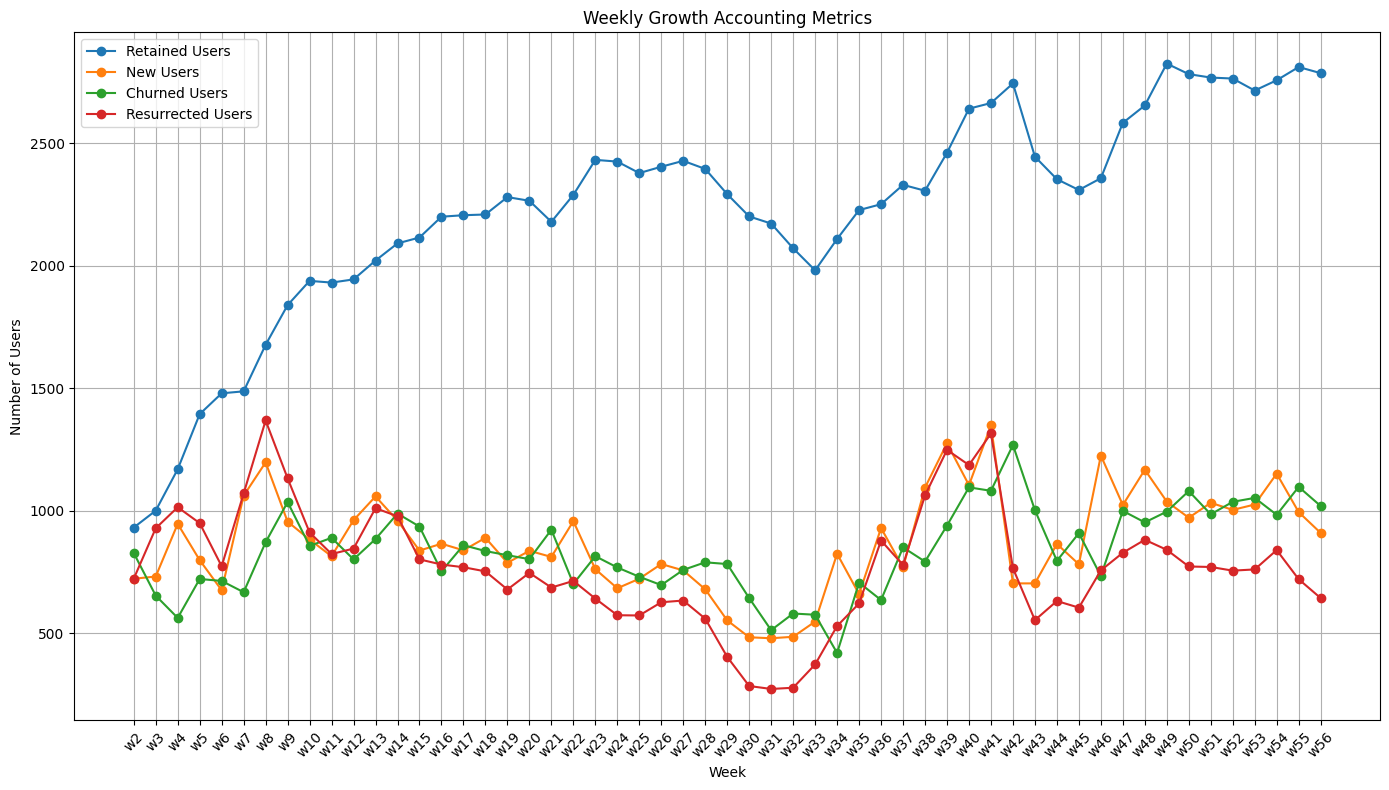

In [4]:
# Plot the Weekly Growth Accounting chart
plt.figure(figsize=(14, 8))

# Plot each metric
plt.plot(growth_metrics['Week'], growth_metrics['Retained Users'], marker='o', label='Retained Users')
plt.plot(growth_metrics['Week'], growth_metrics['New Users'], marker='o', label='New Users')
plt.plot(growth_metrics['Week'], growth_metrics['Churned Users'], marker='o', label='Churned Users')
plt.plot(growth_metrics['Week'], growth_metrics['Resurrected Users'], marker='o', label='Resurrected Users')

# Customize the plot
plt.title('Weekly Growth Accounting Metrics')
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Key Insights from the Chart:

## 1. Retained Users:

### The steady increase in retained users indicates improving user loyalty and satisfaction.

## 2. New Users:

### The fluctuations in new users suggest variability in user acquisition efforts or external factors influencing user sign-ups.


## 3. Churned Users:

### The general decrease in churned users is a positive indicator, showing that fewer users are leaving over time.

## 4. Resurrected Users:

### The consistent presence of resurrected users highlights effective re-engagement strategies bringing back previously inactive users.

# Questions

## 1. Can retained users be 0 in some week?

### If there is no user who was active in both the previous and current week, the retained users could indeed be 0 for that week.

## 2.Can churned users be 0 in some week?

###  If every user from the previous week remains active in the current week, the churned users could be 0 for that week.


## 3. Can resurrected users be 0 in some week?

###  If no users return to activity after a period of inactivity, the resurrected users could be 0 for that week.